In [1]:
# import packages 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

**Explatory Data Analysis**

In [2]:
# Load the data
df = pd.read_csv('data/laliga_player_stats_english.csv')
# A compiled stats of all the 570players in the LaLiga 2019-2020 season.
# This includes the stats such as the goals scored, assists and appearance, etc.
# https://www.kaggle.com/datasets/thegreatcoder/laliga-player-stats

In [3]:
df.head(10)

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.000,0.000,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.000,0.000,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,0,25,6,19,887.000,128.000,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,0,3,2,1,155.000,49.000,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,0,15,107,38,69,536.000,457.000,78,1,0
5,Athletic Club,Defender,4.0,I. Martínez,2.903,33,87.00%,32,84.00%,33,...,0,53,329,162,167,1.440,1.074,361,5,0
6,Athletic Club,Defender,5.0,Yeray,2.614,30,79.00%,28,74.00%,30,...,0,55,296,126,170,1.284,1.051,233,0,0
7,Athletic Club,Defender,6.0,San José,1.716,33,87.00%,15,39.00%,16,...,0,42,243,141,102,707.000,637.000,64,6,0
8,Athletic Club,Defender,12.0,Yuri B.,3.120,35,92.00%,33,87.00%,35,...,2,48,373,254,119,1.367,1.273,92,2,1
9,Athletic Club,Defender,15.0,I. Lekue,210.000,4,11.00%,2,5.00%,2,...,2,5,29,20,9,85.000,75.000,10,0,0


In [4]:
df.describe()

,Shirt number,Minutes played,Games played,Full games played,Games started,Games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
count,526.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,...,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,15.688213,125.863646,18.602518,10.798561,14.825540,7.803957,3.284173,0.138489,0.084532,1.696043,...,6.485612,22.598921,151.870504,102.411871,49.458633,298.276849,287.366338,86.906475,1.705036,1.059353
std,10.143810,239.665055,12.462351,10.560289,11.746272,7.635341,3.320995,0.398954,0.309102,3.503828,...,19.998328,22.882684,137.610291,97.469928,58.638456,323.996696,303.818053,126.842323,4.109673,1.746575
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.250000,1.546250,6.000000,1.000000,3.750000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,20.000000,12.000000,6.750000,1.436000,1.701750,7.000000,0.000000,0.000000
50%,15.000000,2.413000,20.000000,8.000000,14.500000,5.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,16.000000,127.000000,79.000000,32.000000,165.000000,166.000000,43.500000,0.000000,0.000000
75%,22.000000,90.000000,31.000000,18.250000,25.000000,13.000000,5.000000,0.000000,0.000000,2.000000,...,1.000000,38.000000,247.000000,170.000000,73.250000,579.250000,549.500000,113.500000,2.000000,1.000000
max,57.000000,999.000000,38.000000,38.000000,38.000000,34.000000,15.000000,2.000000,2.000000,36.000000,...,170.000000,110.000000,746.000000,452.000000,442.000000,987.000000,987.000000,988.000000,70.000000,10.000000


In [5]:
print(df.dtypes)

Team                         object
Position                     object
Shirt number                float64
Name                         object
Minutes played              float64
                             ...   
Passes                      float64
Short passes                float64
Long passes                   int64
Through balls                 int64
Goals scored per attempt      int64
Length: 62, dtype: object


In [6]:
# Assuming df is the DataFrame
# Only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
print(numeric_df.dtypes)  # Just to verify that all are numeric


Shirt number                            float64
Minutes played                          float64
Games played                              int64
Full games played                         int64
Games started                             int64
Games where substituted                   int64
Yellow Cards                              int64
Red Cards                                 int64
Second Yellows                            int64
Goals scored                              int64
Penalties scored                          int64
Own goals                                 int64
Goals conceded while player on pitch      int64
Tackles                                   int64
Interceptions                             int64
Recoveries                                int64
Clearances                                int64
Successful tackles                        int64
Unssuccessful tackles                     int64
Last man                                  int64
Successful duels                        

In [7]:
# Fill missing values with the mean of each column
numeric_df_filled = numeric_df.fillna(numeric_df.mean())
corr_matrix_filled = numeric_df_filled.corr()

# Dropped rows with any missing values
numeric_df_dropped = numeric_df.dropna()
corr_matrix_dropped = numeric_df_dropped.corr()


In [8]:
# Function to convert percentage strings to floats
def percentage_to_float(s):
    if isinstance(s, str):
        return float(s.strip('%')) / 100
    else:
        return s

# Function to ALL columns that contain percentage values
percentage_columns = ['Percentage of games played', 'Percentage of full games played', 'Percentage of games started', 'Percentage of games where substituted']
for col in percentage_columns:
    df[col] = df[col].apply(percentage_to_float)

# Confirm conversion
print(df[percentage_columns].head())


   Percentage of games played  Percentage of full games played  \
0                        0.00                             0.00   
1                        0.00                             0.00   
2                        0.82                             0.82   
3                        0.18                             0.18   
4                        0.32                             0.29   

   Percentage of games started  Percentage of games where substituted  
0                         0.00                                   0.00  
1                         0.00                                   0.00  
2                         0.82                                   0.00  
3                         0.18                                   0.00  
4                         0.29                                   0.03  


In [9]:

# Now, I calculate the correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)


                                      Shirt number  Minutes played  \
Shirt number                              1.000000       -0.023747   
Minutes played                           -0.023747        1.000000   
Games played                             -0.445639       -0.282421   
Full games played                        -0.407365       -0.369789   
Games started                            -0.436118       -0.376947   
Games where substituted                  -0.149732        0.050482   
Yellow Cards                             -0.306484       -0.287554   
Red Cards                                -0.132050       -0.102330   
Second Yellows                           -0.137574       -0.094863   
Goals scored                             -0.156100       -0.172889   
Penalties scored                         -0.116790       -0.079644   
Own goals                                -0.136648       -0.029685   
Goals conceded while player on pitch     -0.422842       -0.325553   
Tackles             

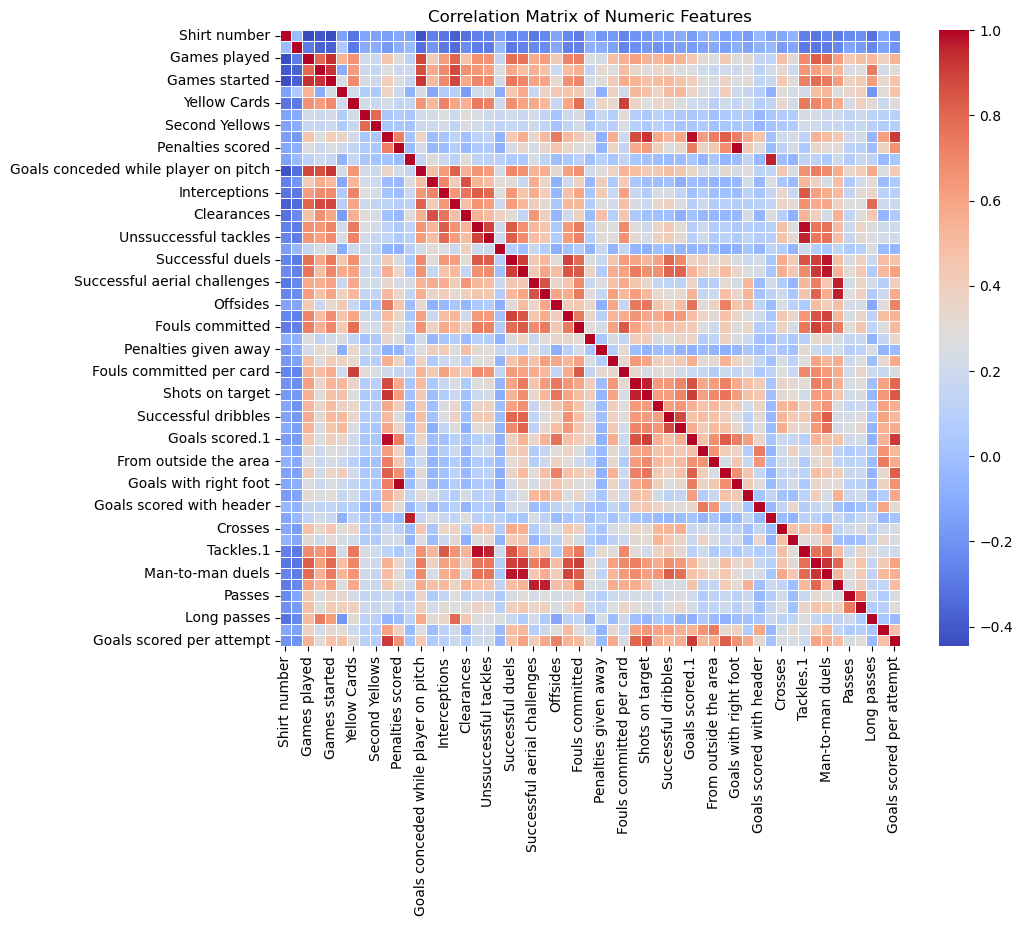

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


C:\Users\15712\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


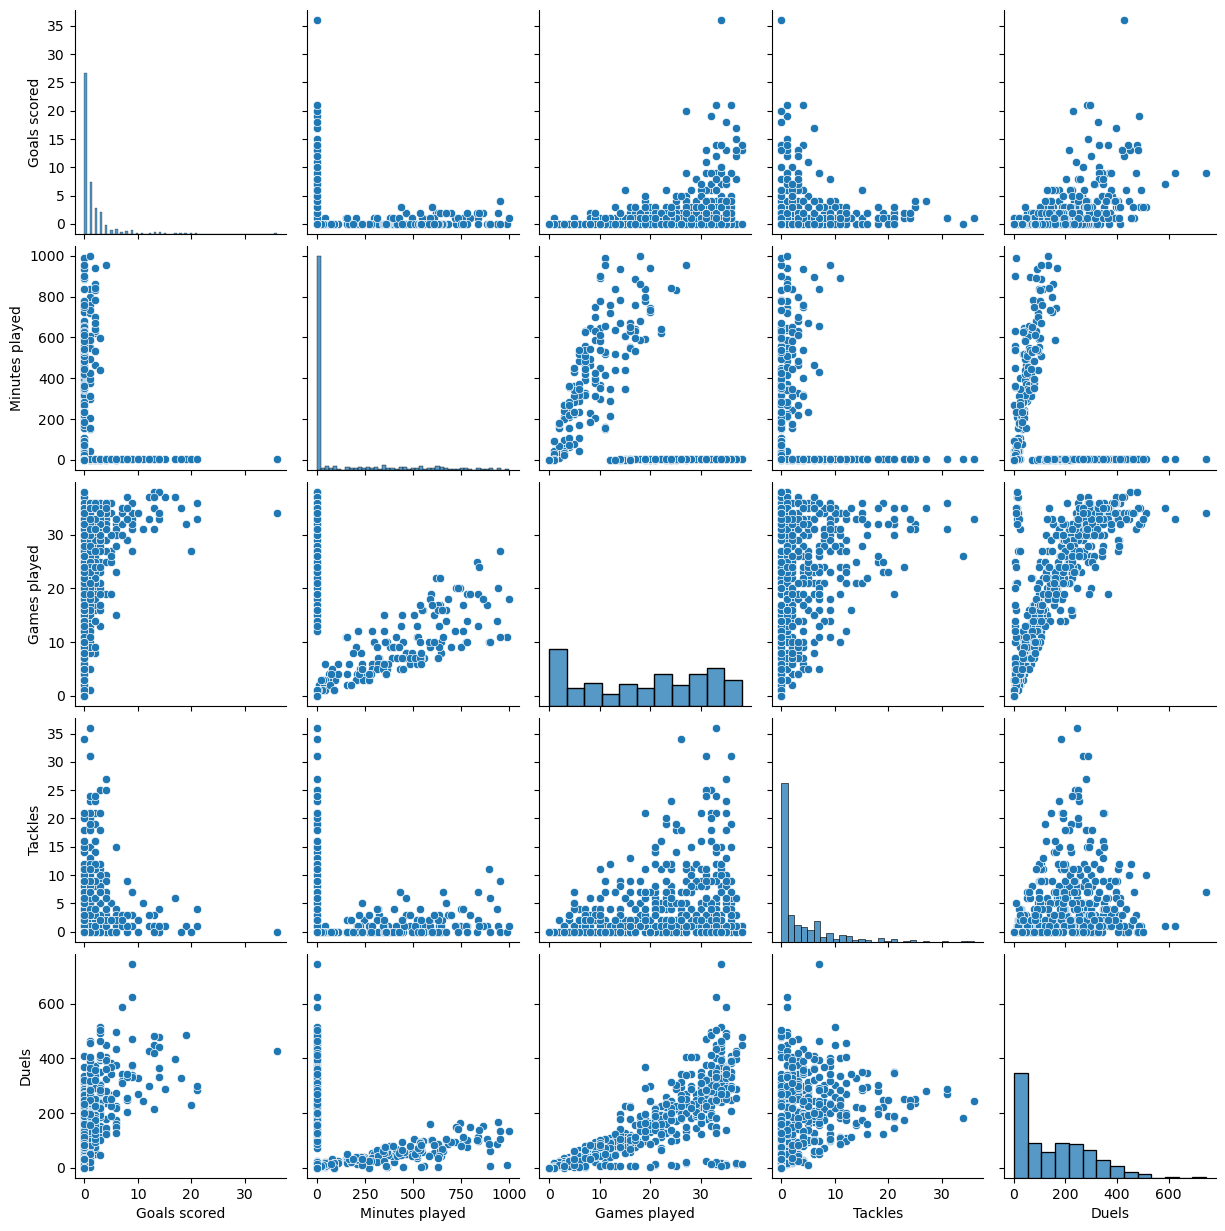

In [11]:
# Basic statistics and visualizations
sns.pairplot(df[['Goals scored', 'Minutes played', 'Games played', 'Tackles', 'Duels']], height=2.5)
plt.show()

**Feature Engineering**

In [12]:
import pandas as pd

# Calculate 'Duels won' (if this represents the total number of duels a player won)
df['Duels won'] = df['Successful duels']  # or any other columns that represent successful duels

# Calculate 'Duels contested' (if this represents the total duels a player has been involved in)
df['Duels contested'] = df['Duels']  # assuming 'Duels' represents total duels contested

# Check if columns have any missing values
df[['Duels won', 'Duels contested']] = df[['Duels won', 'Duels contested']].fillna(0)

# Calculate duel win rate
df['duel_win_rate'] = df['Duels won'] / df['Duels contested']

# Calculate performance index
# Note: Use df['Penalties scored'] if in a situation
df['performance_index'] = (df['Goals scored'] + df['Assists']) / df['Minutes played']

# Normalize minutes played
df['normalized_minutes'] = (df['Minutes played'] - df['Minutes played'].mean()) / df['Minutes played'].std()

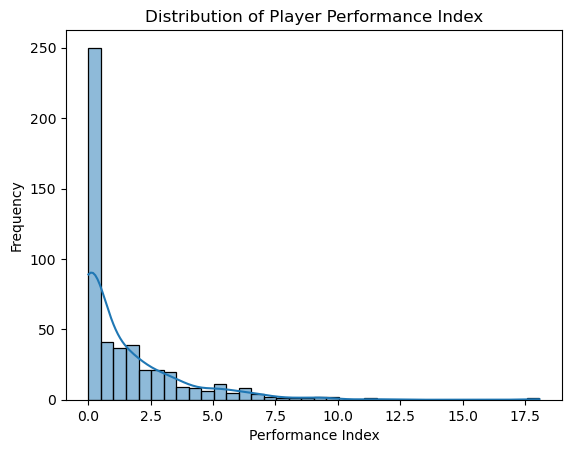

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['performance_index'], kde=True)
plt.title('Distribution of Player Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()


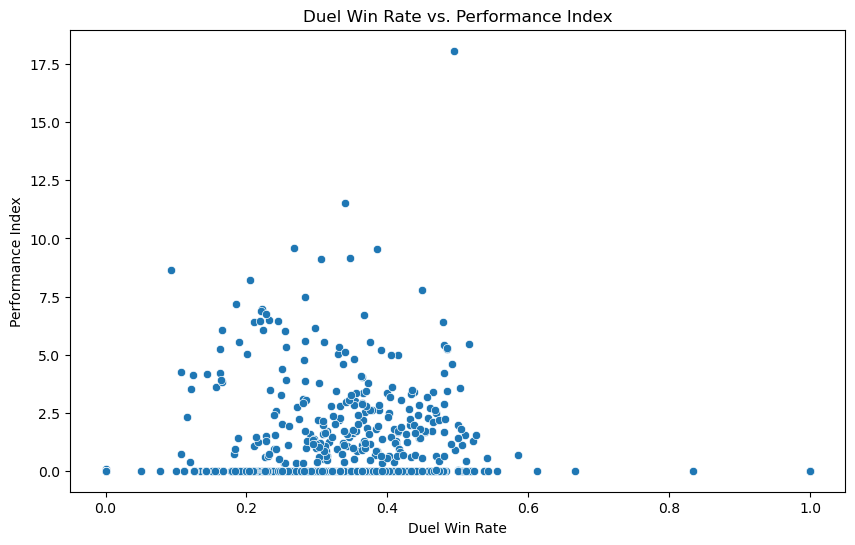

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duel_win_rate', y='performance_index', data=df)
plt.title('Duel Win Rate vs. Performance Index')
plt.xlabel('Duel Win Rate')
plt.ylabel('Performance Index')
plt.show()


In [15]:
# Filter top performers
top_performers = df[df['performance_index'] > df['performance_index'].quantile(0.90)]

# Display basic stats of top performers
print(top_performers[['Name', 'Team', 'Goals scored', 'Assists', 'Minutes played', 'performance_index']])


                  Name                Team  Goals scored  Assists  \
21         Raúl García       Athletic Club             9        3   
26            Williams       Athletic Club            13        4   
27            Muniain        Athletic Club             7        4   
54           Griezmann  Atlético de Madrid            15        9   
59              Morata  Atlético de Madrid             6        1   
84   Youssef En-Nesyri          CD Leganés             9        2   
89         Braithwaite          CD Leganés             4        5   
107               Jony           D. Alavés             5       10   
136              Vidal        FC Barcelona             3        7   
137             Suárez        FC Barcelona            21        6   
138              Messi        FC Barcelona            36       13   
139         O. Dembélé        FC Barcelona             8        5   
163               Mata           Getafe CF            14        6   
164             Ángel            G

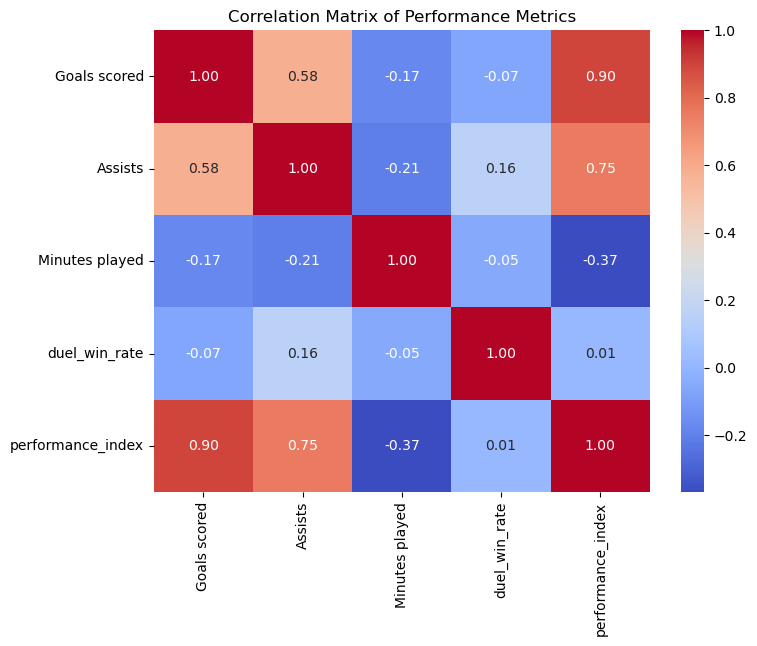

In [16]:
# Compute the correlation matrix
corr_matrix = df[['Goals scored', 'Assists', 'Minutes played', 'duel_win_rate', 'performance_index']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


**Preditive Modeling**

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Prepare data
X = df[['Goals scored', 'Assists', 'Minutes played', 'duel_win_rate']]
y = df['performance_index']

# Handling NaN values in the target variable
y = y.fillna(y.mean())  # Impute NaNs in the target with the mean

# Initialize the imputer for features
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Create a pipeline that first imputes missing values in features then fits the linear model
pipeline = Pipeline([
    ('imputer', imputer),
    ('regressor', LinearRegression())
])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)


R-squared Score: 0.877797097917285


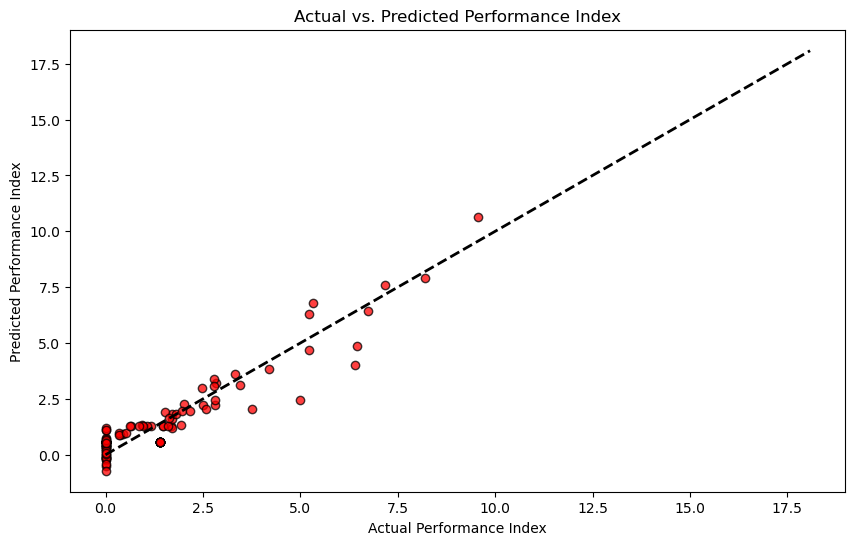

In [18]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='red', edgecolors='k')  # transparency in the plot with alpha
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # reference line
plt.title('Actual vs. Predicted Performance Index')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.show()


**Validation and Testing**

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Simulate mid-season data
df_half_season = df.copy()
stats_columns = ['Minutes played', 'Goals scored', 'Assists', 'Tackles', 'Duels', 'Passes']
df_half_season[stats_columns] = df_half_season[stats_columns] * 0.5

# I set up the imputer and the regressor in a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Prepare data
X_half = df_half_season[stats_columns]
y_half = df_half_season['Goals scored']

# Split data
from sklearn.model_selection import train_test_split
X_train_half, X_val_half, y_train_half, y_val_half = train_test_split(X_half, y_half, test_size=0.2, random_state=42)

# Fit the model on training data using the pipeline
pipeline.fit(X_train_half, y_train_half)

# Validation
y_val_pred = pipeline.predict(X_val_half)
mse_half = mean_squared_error(y_val_half, y_val_pred)
print(f'Validation Mean Squared Error: {mse_half}')


Validation Mean Squared Error: 0.009840178571428581


In [20]:
# Predict the full season's goals for all players
df['predicted_full_season_goals'] = pipeline.predict(df[stats_columns])

# Display the top players by predicted full-season goals
top_performers = df[['Name', 'Team', 'Goals scored', 'predicted_full_season_goals']].sort_values(by='predicted_full_season_goals', ascending=False)
print(top_performers.head(10))


               Name                Team  Goals scored  \
54        Griezmann  Atlético de Madrid            15   
394         Benzema         Real Madrid            21   
138           Messi        FC Barcelona            36   
307      Iago Aspas            RC Celta            20   
501      Ben Yedder          Sevilla FC            18   
137          Suárez        FC Barcelona            21   
331  Borja Iglesias        RCD Espanyol            17   
191          Stuani           Girona FC            19   
163            Mata           Getafe CF            14   
496         Sarabia          Sevilla FC            12   

     predicted_full_season_goals  
54                        14.325  
394                       14.325  
138                       14.320  
307                       14.035  
501                       14.035  
137                       14.020  
331                       12.595  
191                       12.515  
163                       11.375  
496                   

In [21]:
# Assuming a hypothetical annual growth rate in performance
# Of course, it is very uniform
growth_rate = 0.05  # 5% improvement per year

# Forecasting next season's goals
df['forecast_next_season_goals'] = df['predicted_full_season_goals'] * (1 + growth_rate)

# Display the forecasted next season's top performers
forecasted_top_performers = df[['Name', 'Team', 'predicted_full_season_goals', 'forecast_next_season_goals']].sort_values(by='forecast_next_season_goals', ascending=False)
print(forecasted_top_performers.head(10))


               Name                Team  predicted_full_season_goals  \
54        Griezmann  Atlético de Madrid                       14.325   
394         Benzema         Real Madrid                       14.325   
138           Messi        FC Barcelona                       14.320   
307      Iago Aspas            RC Celta                       14.035   
501      Ben Yedder          Sevilla FC                       14.035   
137          Suárez        FC Barcelona                       14.020   
331  Borja Iglesias        RCD Espanyol                       12.595   
191          Stuani           Girona FC                       12.515   
163            Mata           Getafe CF                       11.375   
496         Sarabia          Sevilla FC                       11.350   

     forecast_next_season_goals  
54                     15.04125  
394                    15.04125  
138                    15.03600  
307                    14.73675  
501                    14.73675  
137

In [22]:
#  Results - Using a Pipeline ensures that all preprocessing steps, including imputation, are applied consistently during both training and prediction phases, avoiding common mistakes such as leaking data during transformation.